In [24]:
from gensim.models import KeyedVectors

# 读取词向量文件
path = 'output\quantangshi_emb.txt'
emb = KeyedVectors.load_word2vec_format(path, binary=False, unicode_errors='ignore')
print(emb)

KeyedVectors<vector_size=100, 5504 keys>


In [25]:
from gensim.models import KeyedVectors
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

two_letter_words = [word for word in emb.index_to_key if len(word) == 2]
print(two_letter_words)

similarity_matrix = np.zeros((len(two_letter_words), len(two_letter_words)))

for i, word1 in enumerate(two_letter_words):
    for j, word2 in enumerate(two_letter_words):
        if i <= j:  # 因为余弦相似度矩阵是对称的，所以只需计算上三角部分
            similarity = cosine_similarity([emb[word1]], [emb[word2]])[0][0]
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # 对称位置也设置为相似度值


['悠悠', '蒼蒼', '蕭蕭', '紛紛', '茫茫', '寂寂', '依依', '青青', '沈沈', '迢迢', '漠漠', '翩翩', '冥冥', '遲遲', '重重', '漫漫', '萋萋', '濛濛', '霏霏', '泠泠', '杳杳', '淒淒', '浩浩', '亭亭', '寥寥', '飄飄', '微微', '耿耿', '渺渺', '擾擾', '肅肅', '冉冉', '潺潺', '颯颯', '高高', '鬱鬱', '嫋嫋', '離離', '皎皎', '歷歷', '喧喧', '森森', '褭褭', '騰騰', '悄悄', '纖纖', '遙遙', '草草', '峨峨', '團團', '陰陰', '隱隱', '煌煌', '明明', '營營', '昏昏', '綿綿', '啾啾', '赫赫', '盈盈', '瑟瑟', '兀兀', '藹藹', '落落', '滔滔', '溶溶', '的的', '灼灼', '切切', '區區', '纍纍', '靄靄', '堂堂', '默默', '忽忽', '娟娟', '層層', '珊珊', '巍巍', '哀哀', '戚戚', '熒熒', '脈脈', '丁丁', '昭昭', '芊芊', '颼颼', '悽悽', '駸駸', '穆穆', '涓涓', '熙熙', '淅淅', '濟濟', '小小', '輕輕', '靡靡', '磷磷', '斑斑', '泛泛', '慘慘', '鏘鏘', '黯黯', '澹澹', '淼淼', '眇眇', '軋軋', '曈曈', '脉脉', '漾漾', '關關', '皇皇', '蕩蕩', '欣欣', '惻惻', '搖搖', '獵獵', '了了', '洋洋', '凜凜', '唧唧', '融融', '連連', '苒苒', '深深', '沉沉', '灩灩', '簇簇', '愔愔', '穰穰', '湛湛', '炎炎', '嗚嗚', '幽幽', '徐徐', '奕奕', '促促', '翻翻', '細細', '鼕鼕', '輝輝', '習習', '稜稜', '宛宛', '空空', '孜孜', '澄澄', '陶陶', '遠遠', '拂拂', '碌碌', '頻頻', '叢叢', '田田', '醺醺', '籍籍', '怱怱', '烈烈', '索索', '冪冪', '皚皚', '汲汲', '役役', '瀟瀟', '巉巉', '豔豔', '憧憧

In [26]:
print(similarity_matrix)

[[ 0.99999994  0.36581203  0.42903933 ...  0.11059996 -0.01559079
   0.22724324]
 [ 0.36581203  0.99999994  0.47561562 ...  0.2830258   0.13205713
   0.07685231]
 [ 0.42903933  0.47561562  0.99999994 ...  0.34142089  0.00288165
   0.00154526]
 ...
 [ 0.11059996  0.2830258   0.34142089 ...  1.00000012  0.32327077
  -0.07128906]
 [-0.01559079  0.13205713  0.00288165 ...  0.32327077  1.
   0.17016521]
 [ 0.22724324  0.07685231  0.00154526 ... -0.07128906  0.17016521
   0.99999994]]


In [27]:
import numpy as np

# 假设 similarity_matrix 是你的余弦相似度矩阵
# 如果矩阵太大，你可以只计算一个子集的统计量

min_value = np.min(similarity_matrix)
max_value = np.max(similarity_matrix)
mean_value = np.mean(similarity_matrix)
std_value = np.std(similarity_matrix)

print("最小值:", min_value)
print("最大值:", max_value)
print("平均值:", mean_value)
print("标准差:", std_value)


最小值: -0.24123026430606842
最大值: 1.000000238418579
平均值: 0.18897925070176588
标准差: 0.13666475186363927


In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 設置本地字體文件路徑
font_path = r'C:\Windows\Fonts\simkai.ttf'

# 使用FontProperties類來設置字體
custom_font = mpl.font_manager.FontProperties(fname=font_path)

# 設置Matplotlib的rcParams
plt.rcParams['font.sans-serif'] = custom_font.get_name()
mpl.rcParams['font.sans-serif'] = custom_font.get_name()


C:\Users\xiangpu\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


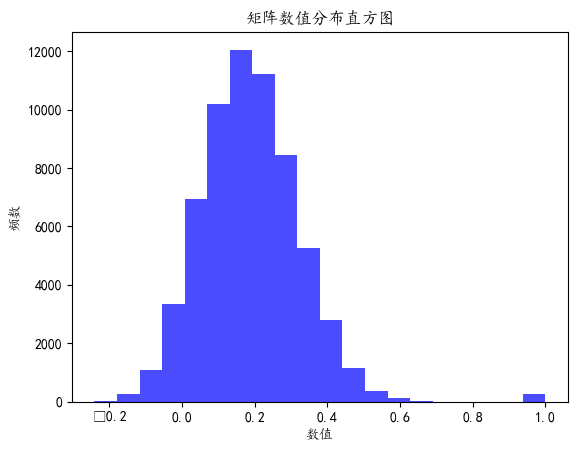

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 假设你有一个存储矩阵数值的numpy数组
matrix_values = []
for i in similarity_matrix:
    for j in i:
        matrix_values.append(j)
# 绘制直方图
plt.hist(matrix_values, bins=20, color='blue', alpha=0.7)  # alpha参数控制透明度
plt.xlabel('数值')
plt.ylabel('频数')
plt.title('矩阵数值分布直方图')
plt.show()


In [32]:
import numpy as np
import pandas as pd

threshold = 0.5  # 相似度阈值，大于该值的才添加为边

# 获取满足条件的边及相似度
edges = []
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > threshold:
            edges.append((two_letter_words[i], two_letter_words[j], similarity))

# 创建 DataFrame 存储边和相似度
df = pd.DataFrame(edges, columns=["Source", "Target", "Similarity"])

# 将 DataFrame 导出为 CSV 文件
csv_filename = "output/gephi_data0.5.csv"
df.to_csv(csv_filename, index=False)

print("CSV 文件导出成功:", csv_filename)


CSV 文件导出成功: output/gephi_data0.5.csv


In [5]:
# import numpy as np
# from gensim.models import KeyedVectors
## 生成鄰接矩陣
# # Load word vectors
# path ='output\quantangshi_emb.txt'
# emb = KeyedVectors.load_word2vec_format(path, binary=False, unicode_errors='ignore')

# # Get the list of words
# words = emb.index_to_key

# # Calculate similarity (using cosine similarity as an example)
# def cosine_similarity(word1, word2):
#     vec1 = emb.get_vector(word1)
#     vec2 = emb.get_vector(word2)
#     dot_product = np.dot(vec1, vec2)
#     norm1 = np.linalg.norm(vec1)
#     norm2 = np.linalg.norm(vec2)
#     similarity = dot_product / (norm1 * norm2)
#     return similarity

# # Build the adjacency matrix
# num_words = len(words)
# adj_matrix = np.zeros((num_words, num_words))
# for i in range(num_words):
#     for j in range(i+1, num_words):
#         word1 = words[i]
#         word2 = words[j]
#         similarity = cosine_similarity(word1, word2)
#         adj_matrix[i][j] = similarity
#         adj_matrix[j][i] = similarity

# print(adj_matrix)


[[0.         0.87850261 0.53385812 ... 0.27132159 0.35483015 0.31306884]
 [0.87850261 0.         0.48245493 ... 0.21311283 0.2970328  0.2724368 ]
 [0.53385812 0.48245493 0.         ... 0.30841663 0.03915691 0.20762514]
 ...
 [0.27132159 0.21311283 0.30841663 ... 0.         0.30434901 0.27039421]
 [0.35483015 0.2970328  0.03915691 ... 0.30434901 0.         0.16695002]
 [0.31306884 0.2724368  0.20762514 ... 0.27039421 0.16695002 0.        ]]


In [ ]:

# # 将adj_matrix保存为本地文件
# np.save('output/adj_matrix.npy', adj_matrix)

In [1]:
# import numpy as np

# # 从本地文件加载adj_matrix
# loaded_adj_matrix = np.load('output/adj_matrix.npy')

'd:\\github repo\\quan_tang_shi_analysis2\\word_similarity_network.html'